In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
tf.__version__

'2.9.0'

In [3]:
tf.config.get_visible_devices(
    device_type=None
)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [5]:
train_data_dir = "train"
validation_data_dir = "val"
test_data_dir = "test"

In [6]:
img_width, img_height = 224, 224

In [7]:
# Data Augmentation (Adjust as needed)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range = 0.2,
    horizontal_flip=True
)


In [8]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Load pre-trained ResNet50 model (without top layers)
base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(img_height, img_width, 3))

In [10]:
# Freeze pre-trained layers (optional)
for layer in base_model.layers:
    layer.trainable = False

In [11]:
# Add custom layers for classification
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation="relu")(x)  # Adjust number of units if needed
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(9, activation="softmax")(x)  # Adjust for your number of classes

In [12]:
# Create final model
model = Model(inputs=base_model.input, outputs=predictions)

In [13]:
# Compile the model
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.0001), metrics=["accuracy"])

In [14]:
# Callbacks
early_stopping = EarlyStopping(monitor="val_loss", patience=3)
model_checkpoint = ModelCheckpoint("final_dd_model.h5", save_best_only=True)

In [15]:
# Train the model
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=32,  # Adjust batch size as needed
    class_mode="categorical"
)

Found 12894 images belonging to 9 classes.


In [16]:
validation_generator = validation_datagen.flow_from_directory(
  validation_data_dir,
  target_size=(img_width, img_height),
  batch_size=32,
  class_mode="categorical"
)

Found 2765 images belonging to 9 classes.


In [17]:
history = model.fit_generator(
  train_generator,
  epochs=10, # Adjust epochs as needed
  validation_data=validation_generator,
)

C:\Temp\ipykernel_13332\1363156736.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/10
806/806 [==============================] - 582s 717ms/step - loss: 2.2762 - accuracy: 0.1341 - val_loss: 2.1437 - val_accuracy: 0.1761
Epoch 2/10
806/806 [==============================] - 290s 360ms/step - loss: 2.1185 - accuracy: 0.1537 - val_loss: 2.0541 - val_accuracy: 0.2047
Epoch 3/10
806/806 [==============================] - 130s 161ms/step - loss: 2.0778 - accuracy: 0.1619 - val_loss: 2.0110 - val_accuracy: 0.2116
Epoch 4/10
806/806 [==============================] - 128s 158ms/step - loss: 2.0471 - accuracy: 0.1652 - val_loss: 1.9559 - val_accuracy: 0.2394
Epoch 5/10
806/806 [==============================] - 128s 158ms/step - loss: 2.0279 - accuracy: 0.1674 - val_loss: 1.9800 - val_accuracy: 0.2354
Epoch 6/10
806/806 [==============================] - 127s 158ms/step - loss: 2.0175 - accuracy: 0.1664 - val_loss: 1.9183 - val_accuracy: 0.2459
Epoch 7/10
806/806 [==============================] - 127s 158ms/step - loss: 2.0049 - accuracy: 0.1729 - val_loss: 1.8849 -

In [18]:
# Evaluate the model on the validation set (optional)
loss, accuracy = model.evaluate_generator(validation_generator)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

C:\Temp\ipykernel_13332\3928011442.py:2: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(validation_generator)


Validation Loss: 1.8275530338287354
Validation Accuracy: 0.25931283831596375


In [19]:
model.save("final_model.h5")

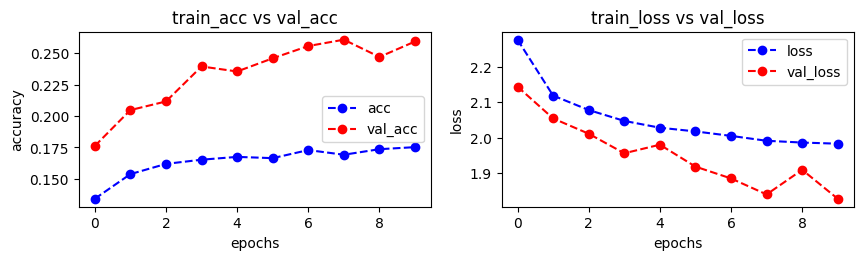

In [20]:
import matplotlib.pyplot as plt

def plot(history):
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'], 'bo--', label = "acc")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_acc")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()
    
    #Plot Loss function
    plt.subplot(222)
    plt.plot(history.history['loss'], 'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()
plot(history)